### Assignment 9
#### Preparing  rules for the Movie data sets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [4]:
movies=pd.read_csv("my_movies.csv")
movies=movies.replace(np.nan,'',regex=True)
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,,,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,,,,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,,,,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,,,,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,,1,1,0,0,0,0,0,1,0,1


### Checking for Shape

In [5]:
movies.shape

(10, 15)

#### Checking for NULL values 

In [6]:
movies.isna().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
movies.shape

(10, 15)

In [8]:
movies.V1.unique()

array(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1'], dtype=object)

In [9]:
movies.V2.unique()

array(['LOTR1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR'], dtype=object)

In [10]:
movies1=movies.drop('V1',axis=1)
movies1

,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Patriot,Braveheart,,,0,1,0,0,1,0,0,0,1,0
2,LOTR2,,,,0,0,1,0,0,1,0,0,0,0
3,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
4,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
5,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
6,Harry Potter2,,,,0,0,0,1,0,0,1,0,0,0
7,Patriot,,,,0,1,0,0,1,0,0,0,0,0
8,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
9,LOTR,Gladiator,Green Mile,,1,1,0,0,0,0,0,1,0,1


In [11]:
movies1=movies1.drop('V2',axis=1)

In [12]:
movies1=movies1.drop('V3',axis=1)
movies1=movies1.drop('V4',axis=1)

In [13]:
movies1=movies1.drop('V5',axis=1)
movies1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [14]:
movies1.shape

(10, 10)

In [15]:
movies1.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

### Building an Apriori model using Association rules

In [16]:
freq_set1=apriori(movies1,min_support=0.4,use_colnames=True)
freq_set1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Patriot, Sixth Sense)"


In [17]:
rules_1=association_rules(freq_set1,metric='lift',min_threshold=0.7)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [18]:
rules_1.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
10,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [19]:
rules_1[rules_1["lift"]>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


### Visualization

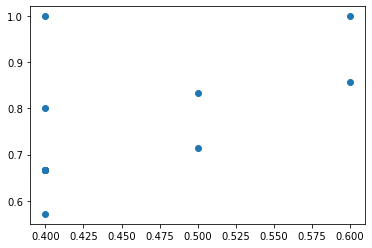

In [20]:
plt.scatter(x='support',y='confidence',data=rules_1)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift', ylabel='Density'>

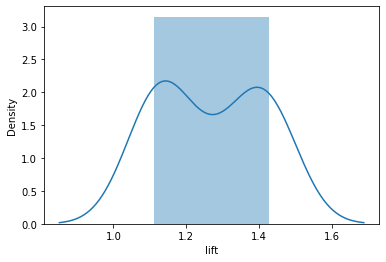

In [21]:
sns.distplot(rules_1.lift)

<AxesSubplot:xlabel='support'>

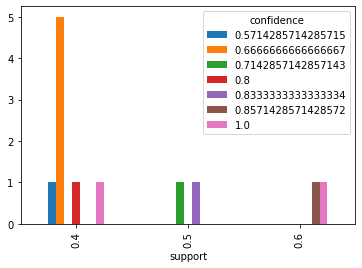

In [22]:
pd.crosstab(rules_1.support,rules_1.confidence).plot(kind="bar")

<AxesSubplot:ylabel='support'>

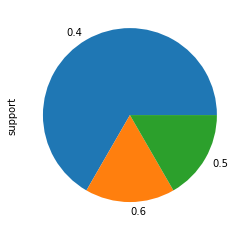

In [23]:

rules_1["support"].value_counts()
rules_1.support.value_counts().plot(kind="pie")

### Conclusion -

#### My_Movie dataset Apriori Algorithm is done min_support =0.1 is given and then association rules 'lift' type is done where min_threshold is 0.7 as taken and output is obtained for that. Than lift>1 values is been filtered form the output.¶
